In [1]:
import pandas as pd
import numpy as np
seed = 7
np.random.seed(seed)
dataframe = pd.read_csv("interstate.csv")
featureSet =['side','initiation','combat_location','combat_fatalities']
print()

# split into input (X) and output (Y) variables
X = dataframe[featureSet].astype(float)
Y = dataframe['outcome']

In [2]:
import sklearn
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.utils import np_utils


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33,random_state =7)

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')



ohe.fit(X_train)
X_train_encoded = ohe.transform(X_train)
X_test_encoded = ohe.transform(X_test)


encoder = preprocessing.LabelEncoder()
encoder.fit(y_test)
encoded_y_test = encoder.transform(y_test)
dummy_y_test = np_utils.to_categorical(encoded_y_test,6)

encoder = preprocessing.LabelEncoder()
encoder.fit(y_train)
encoded_y_train = encoder.transform(y_train)
dummy_y_train = np_utils.to_categorical(encoded_y_train,6)


Using TensorFlow backend.


In [3]:
from keras.models import Sequential

from keras.layers import Dense,Activation

from keras.wrappers.scikit_learn import KerasClassifier
from keras import optimizers
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import datetime
from sklearn.model_selection import StratifiedKFold


def create_model(): 
    model = Sequential() 
    model.add(Dense(10, input_dim=150, activation="relu")) 

    model.add(Dense(6, activation="softmax")) 
    
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"]) 
    return model

model = KerasClassifier(build_fn=create_model, epochs=40, batch_size=10)
history=model.fit(X_train_encoded,dummy_y_train,validation_data=(X_test_encoded,dummy_y_test))






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 225 samples, validate on 112 samples
Epoch 1/40
225/225 [==============================] - 2s 10ms/step - loss: 1.8040 - acc: 0.1289 - val_loss: 1.7621 - val_acc: 0.3750
Epoch 2/40
225/225 [==============================] - 0s 782us/step - loss: 1.7444 - acc: 0.3689 - val_loss: 1.7120 - val_acc: 0.6429
Epoch 3/40
225/225 [==============================] - 0s 831us/step - loss: 1.6868 - acc: 0.6222 - val_loss: 1.6533 - val_acc: 0.7768
Epoch 4/40
225/225 [==============================] - 0s 769us/step - loss: 1.6182 - acc: 0.7689 - val_loss: 1.5787 - val_acc: 0.8125
Epoch 5/40
225/225 [==============================] - 0s 698us/step - loss: 1.5321 - acc: 0.7911 - val_loss: 1.4927 - val_acc: 0.8125
Epoch 6/40
225/225 [==============================] - 0s 769us/step - loss: 1.4371 - acc: 0.8000 - val_loss: 1.3960 - val_acc: 0.8125
Epoch 7/40
225/225 [==============================]

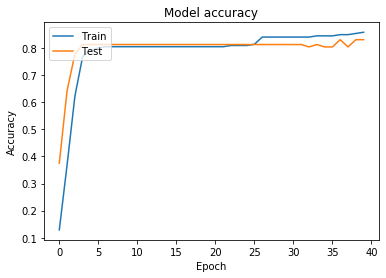

In [4]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

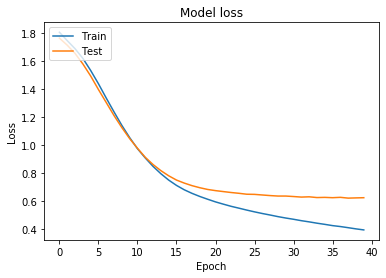

In [5]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()